## Snehal Sawant

## K- Means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the iris dataset
iris = sns.load_dataset("iris")
iris.head() # See the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
x=iris.drop(['species'],axis =1).values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Elbow Method

To find the optimum value of K we use elbow method.

In [5]:
# elbow method to find optimal number of clusters
# inertia(minimizing criteria) is the sum of squared error for each cluster.
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

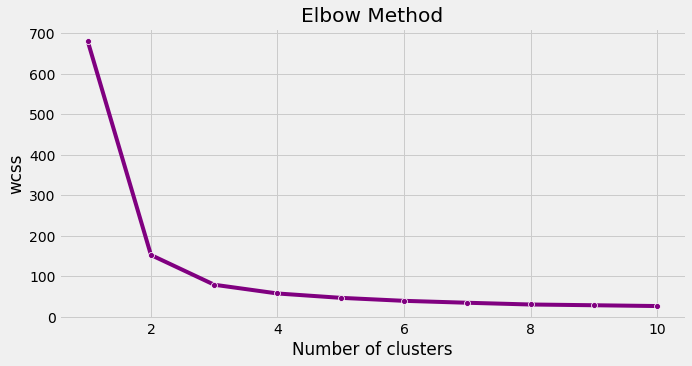

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o', color = 'purple')
plt.title('Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel('wcss')

From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

# K-Means Clustering

In [7]:
# Fitting k-means to dataset
kmeans= KMeans(n_clusters = 3, init = 'k-means++',random_state=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)
print(y_kmeans.shape)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)


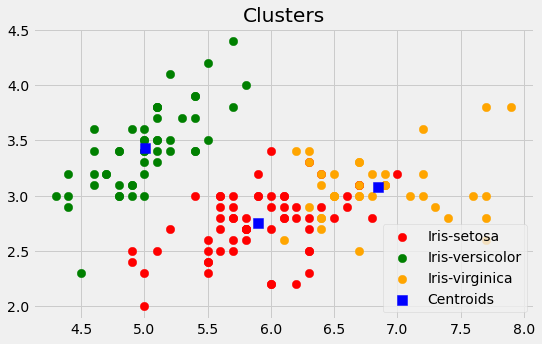

In [8]:
# visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],color = 'red',label = 'Iris-setosa',s= 70)
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],color = 'green',label = 'Iris-versicolor',s= 70)
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],color = 'orange',label = 'Iris-virginica',s= 70)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                color= 'blue',label = 'Centroids', s= 100, marker = ',')

#plt.grid(False)
plt.title('Clusters')
plt.legend()


Text(0, 0.5, 'Petal Width')

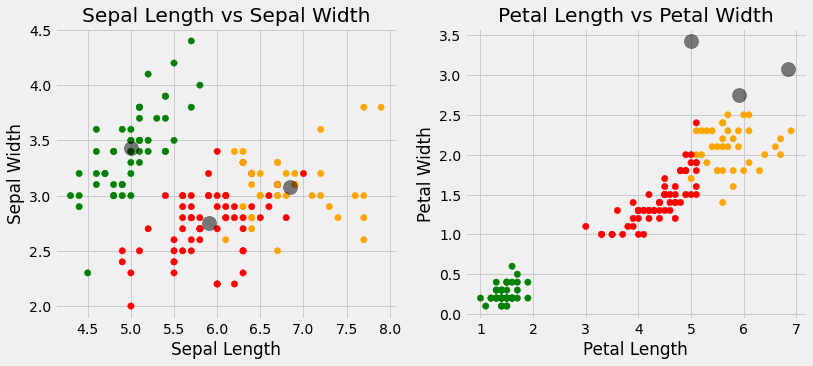

In [9]:
# Visualization of Sepal length vs sepal width and petal length vs petal width
plt.figure(figsize=(12,5))
colors = np.array(['red', 'green', 'orange'])

plt.subplot(1, 2, 1)
plt.scatter(x[:,0], x[:,1], c=colors[y_kmeans], s=40)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel("Sepal Length")
plt.ylabel('Sepal Width')


plt.subplot(1,2,2)
plt.scatter(x[:,2], x[:,3], c=colors[y_kmeans], s=40)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Petal Length vs Petal Width')
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')

